<a href="https://colab.research.google.com/github/CappyCap17/dl_model/blob/main/plant_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Project'

In [4]:
import os

In [5]:
dir_list = os.listdir(path)

In [6]:
dir_list

['soil_classification.csv', 'Train', 'Test', 'Validation']

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 403s 8s/step - accuracy: 0.3326 - loss: 1.2142 - val_accuracy: 0.5312 - val_loss: 1.0702
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1:26 2s/step - accuracy: 0.6562 - loss: 1.0657

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6562 - loss: 1.0657 - val_accuracy: 0.4286 - val_loss: 1.0602
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.5176 - loss: 0.9869
Epoch 4/20


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5000 - loss: 0.8899 - val_accuracy: 0.5938 - val_loss: 0.7394
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.6245 - loss: 0.7771 - val_accuracy: 0.6429 - val_loss: 0.6984
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5938 - loss: 0.7689 
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.6744 - loss: 0.7199 - val_accuracy: 0.5938 - val_loss: 0.7700
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7188 - loss: 0.6038 - val_accuracy: 0.6429 - val_loss: 0.7306
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.7090 - loss: 0.7004
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.6875 - loss: 0.7473 - val_accuracy: 0.7188 - val_loss: 0.6946
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.7623 - loss: 0.6105 - val_accuracy: 0.7500 - val_loss: 0.5666
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.8125 - los

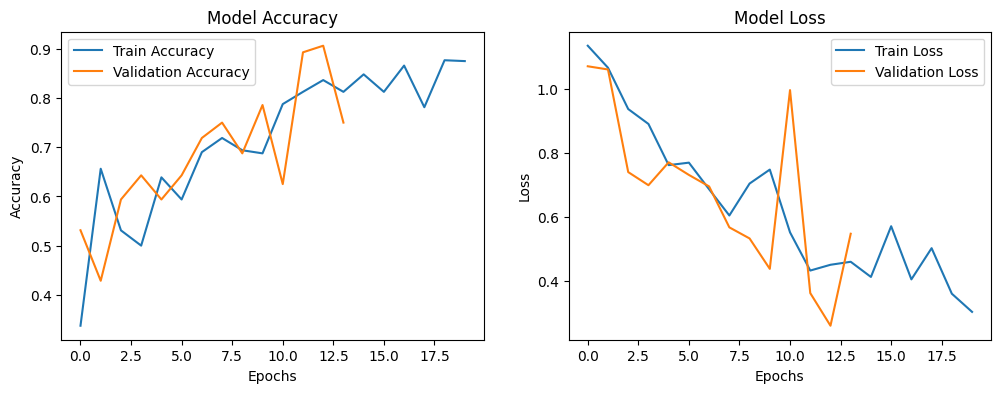

Model saved as 'plant_disease_model.h5'


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set image dimensions
img_width, img_height = 150, 150  # Adjust based on your dataset

# Define paths for training and validation datasets
train_data_dir = '/content/drive/MyDrive/Project/Train/Train'  # Update with your training data path
validation_data_dir = '/content/drive/MyDrive/Project/Validation/Validation'  # Update with your validation data path

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Build the CNN Model

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output Layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Number of classes

# Step 3: Compile the Model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train the Model

# Use EarlyStopping to stop training when validation loss is not decreasing
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the Model

# Plotting training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 6: Save the Model

model.save('plant_disease_model.h5')

print("Model saved as 'plant_disease_model.h5'")


Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 481s 10s/step - accuracy: 0.4712 - loss: 1.0855 - val_accuracy: 0.6016 - val_loss: 0.9433
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7500 - loss: 0.6956

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7500 - loss: 0.6956 - val_accuracy: 0.5909 - val_loss: 0.9474
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.6089 - loss: 0.7970 - val_accuracy: 0.6016 - val_loss: 0.9826
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step - accuracy: 0.5938 - loss: 0.8957 - val_accuracy: 0.5000 - val_loss: 0.8193
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.7334 - loss: 0.6506 - val_accuracy: 0.7578 - val_loss: 0.6272
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8750 - loss: 0.3577 - val_accuracy: 0.8182 - val_loss: 0.6448
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.7958 - loss: 0.5549 - val_accuracy: 0.7500 - val_loss: 0.7746
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7188 - loss: 0.7865 - val_accuracy: 0.7727 - val_loss: 0.7845
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8464 - loss: 0.4277 - val_accuracy: 0.8828 - val_loss: 0.

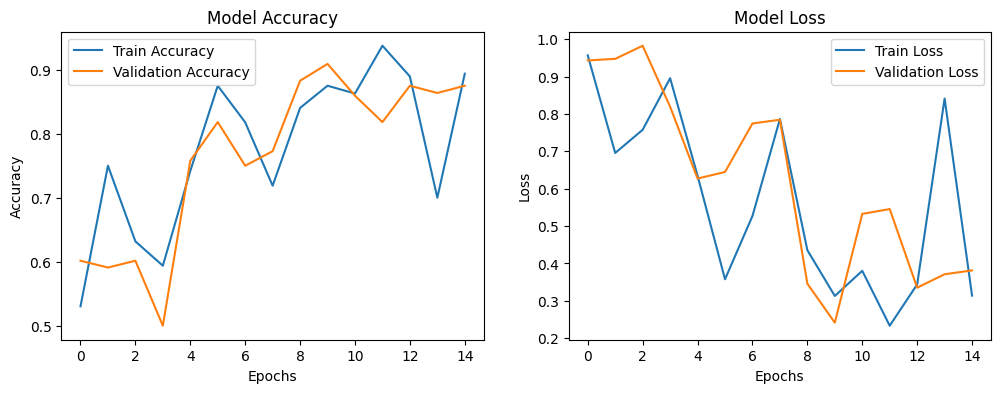

Model saved as 'plant_disease_model2.h5'


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set image dimensions
img_width, img_height = 250, 250  # Adjust based on your dataset

# Define paths for training and validation datasets
train_data_dir = '/content/drive/MyDrive/Project/Train/Train'  # Update with your training data path
validation_data_dir = '/content/drive/MyDrive/Project/Test/Test'  # Update with your validation data path

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Build the CNN Model

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output Layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Number of classes

# Step 3: Compile the Model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train the Model

# Use EarlyStopping to stop training when validation loss is not decreasing
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the Model

# Plotting training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 6: Save the Model

model.save('plant_disease_model2.h5')

print("Model saved as 'plant_disease_model2.h5'")


In [25]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {accuracy:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8457 - loss: 0.4232
Test Accuracy: 0.87


In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


In [16]:
# Load the trained model
model = load_model('plant_disease_model2.h5')


In [17]:
# Parameters (adjust to your model's input size)
img_height, img_width = 150 , 150  # Example size, update as needed

# Preprocessing function
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))  # Resize image
    img_array = img_to_array(img)  # Convert to numpy array
    img_array = img_array / 255.0  # Normalize pixel values (if required)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


In [22]:
# Path to the image you want to test
image_path = '/content/0016_0006.JPG'

# Preprocess the image
test_image = preprocess_image(image_path)

# Make a prediction
predictions = model.predict(test_image)

# Get the predicted class index
predicted_class = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [23]:
# Class names (replace with your actual labels)
class_names = ['Healthy','Rust','Powdery']  # Example labels

# Display the result
print(f"Predicted class: {class_names[predicted_class[0]]}")


Predicted class: Powdery


**Improved code**

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.3584 - loss: 1.7031 - val_accuracy: 0.5703 - val_loss: 0.9571
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6250 - loss: 0.9820 - val_accuracy: 0.4091 - val_loss: 0.9933
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5026 - loss: 0.9609 - val_accuracy: 0.5469 - val_loss: 1.0560
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7188 - loss: 0.6664 - val_accuracy: 0.5909 - val_loss: 0.7497
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6729 - loss: 0.7430 - val_accuracy: 0.7109 - val_loss: 0.7407
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7500 - loss: 0.6866 - val_accuracy: 0.7273 - val_loss: 0.4643
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7687 - loss: 0.5858 - val_accuracy: 0.8125 - val_loss: 0.6725
Epoch 8/20
41/41 ━━━━━━━━━━━

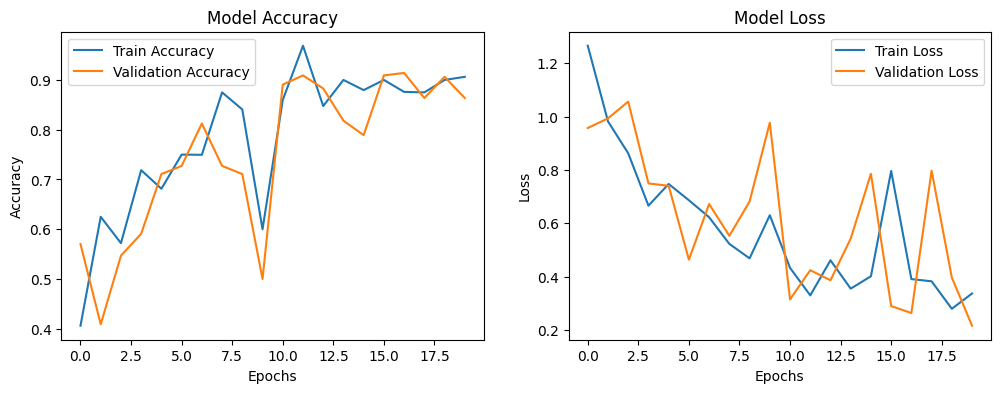

Model saved as 'plant_disease_model2.h5'


In [28]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set image dimensions
img_width, img_height = 250, 250  # Adjust based on your dataset

# Define paths for training and validation datasets
train_data_dir = '/content/drive/MyDrive/Project/Train/Train'  # Update with your training data path
validation_data_dir = '/content/drive/MyDrive/Project/Test/Test'  # Update with your validation data path

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data normalization for validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Build the CNN Model

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output Layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Number of classes

# Step 3: Compile the Model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train the Model

# Use EarlyStopping to stop training when validation loss is not decreasing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the Model

# Plotting training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 6: Save the Model

model.save('plant_disease_model2.h5')

print("Model saved as 'plant_disease_model2.h5'")


In [34]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {accuracy:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9459 - loss: 0.2464
Test Accuracy: 0.91


In [35]:
import numpy as np
import tensorflow as tf

# Step 7: Predict Class for a Test Image
def predict_image(image_path):
    # Load the saved model
    model = tf.keras.models.load_model('plant_disease_model2.h5')

    # Preprocess the input image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    class_labels = list(train_generator.class_indices.keys())  # Get class labels
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label, predictions[0]

# Example usage
image_path = '/content/8ddd5ec1c0de38c4.jpg'  # Replace with your image path
predicted_label, confidence_scores = predict_image(image_path)
print(f"Predicted Label: {predicted_label}")
print(f"Confidence Scores: {confidence_scores}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicted Label: Healthy
Confidence Scores: [1. 0. 0.]
